In [ ]:
  !pip install jalali_pandas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import sklearn
import jalali_pandas
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df_arzeh = pd.read_excel('/content/drive/MyDrive/gozaresh_six_month.xlsx', sheet_name='arzeh')
df_joojeh = pd.read_excel('/content/drive/MyDrive/gozaresh_six_month.xlsx', sheet_name='joojeh')

In [ ]:
df_arzeh.head()

,Resourcecode,ResourceAmount,ReasourceItemCount,LoadCode,LoadAmount,LoadItemCount,LoadRemainingValue,OfferCode,OfferAmount,DeliveryDate,OfferRemainingValue,RequestAmount,RecievedAmount,RecievedItemCount
0,38882,43000.0,17200,143994,27592.4,10613,0,120829,28600.0,1402/02/27,0,28596.0,23650.0,10615.0
1,38892,50000.0,20000,142140,2857.6,1100,0,119224,5980.0,1402/02/20,0,5975.0,2625.0,1100.0
2,38892,50000.0,20000,141572,31756.0,12703,0,118684,32500.0,1402/02/18,0,32496.0,28865.0,12703.0
3,38893,40000.0,16000,144943,32203.0,12882,0,121742,32500.0,1402/02/31,0,32493.0,30895.0,12882.0
4,38894,97500.0,39000,143378,50129.5,20052,0,120369,50000.0,1402/02/26,0,49997.0,52050.0,20052.0


In [ ]:
# Remove rows with Quantity Delivered or Number Delivered equal to 1
df_arzeh = df_arzeh[(df_arzeh['RecievedAmount'] != 1) & (df_arzeh['RecievedItemCount'] != 1)]

In [ ]:
df_arzeh['DeliveryDate'] = df_arzeh['DeliveryDate'].jalali.parse_jalali("%Y/%m/%d")
df_arzeh.head()

,Resourcecode,ResourceAmount,ReasourceItemCount,LoadCode,LoadAmount,LoadItemCount,LoadRemainingValue,OfferCode,OfferAmount,DeliveryDate,OfferRemainingValue,RequestAmount,RecievedAmount,RecievedItemCount
0,38882,43000.0,17200,143994,27592.4,10613,0,120829,28600.0,1402-02-27 00:00:00,0,28596.0,23650.0,10615.0
1,38892,50000.0,20000,142140,2857.6,1100,0,119224,5980.0,1402-02-20 00:00:00,0,5975.0,2625.0,1100.0
2,38892,50000.0,20000,141572,31756.0,12703,0,118684,32500.0,1402-02-18 00:00:00,0,32496.0,28865.0,12703.0
3,38893,40000.0,16000,144943,32203.0,12882,0,121742,32500.0,1402-02-31 00:00:00,0,32493.0,30895.0,12882.0
4,38894,97500.0,39000,143378,50129.5,20052,0,120369,50000.0,1402-02-26 00:00:00,0,49997.0,52050.0,20052.0


In [ ]:
df_joojeh.replace('شهر كرد', 'شهركرد', inplace=True)
df_joojeh.head()

,Resourcecode,SupplierCode,suppplierName,County,Identification,MobileNo,productiondate,HerdName,ItemCount,Amount
0,38892,1978,مرتضي خالدي,لردگان,180809492823,09135746737,1402/01/03,آرین,20000,50000.0
1,38893,1843,مرغداري يونس هژبري(بهراميان),شهركرد,181111100324,09162285948,1402/01/05,آرین,16000,40000.0
2,38894,1968,شركت تعاوني 319 بن(رضوي),بن,181709062222,09133836264,1402/01/05,راس,39000,97500.0
3,38947,1871,مرغداري ستايش(محمود كريمي),فارسان,181209475322,09196114733,1402/01/05,راس,22500,56250.0
4,38882,1975,تعاوني پرورش مرغ گوشتي ققنوس لردگان(فرزين كريمي),لردگان,180809431023,09131291146,1402/01/06,راس,17200,43000.0


In [ ]:
df_joojeh['productiondate'] = df_joojeh['productiondate'].jalali.parse_jalali("%Y/%m/%d")
df_joojeh.head()

,Resourcecode,SupplierCode,suppplierName,County,Identification,MobileNo,productiondate,HerdName,ItemCount,Amount
0,38892,1978,مرتضي خالدي,لردگان,180809492823,09135746737,1402-01-03 00:00:00,آرین,20000,50000.0
1,38893,1843,مرغداري يونس هژبري(بهراميان),شهركرد,181111100324,09162285948,1402-01-05 00:00:00,آرین,16000,40000.0
2,38894,1968,شركت تعاوني 319 بن(رضوي),بن,181709062222,09133836264,1402-01-05 00:00:00,راس,39000,97500.0
3,38947,1871,مرغداري ستايش(محمود كريمي),فارسان,181209475322,09196114733,1402-01-05 00:00:00,راس,22500,56250.0
4,38882,1975,تعاوني پرورش مرغ گوشتي ققنوس لردگان(فرزين كريمي),لردگان,180809431023,09131291146,1402-01-06 00:00:00,راس,17200,43000.0


# Data Wrangling

In [ ]:
df_arzeh.isnull().sum()

Resourcecode             0
ResourceAmount           0
ReasourceItemCount       0
LoadCode                 0
LoadAmount               0
LoadItemCount            0
LoadRemainingValue       0
OfferCode                0
OfferAmount              0
DeliveryDate             0
OfferRemainingValue      0
RequestAmount          123
RecievedAmount         123
RecievedItemCount      123
dtype: int64

In [ ]:
df_joojeh.isnull().sum()

Resourcecode      0
SupplierCode      0
suppplierName     0
County            6
Identification    0
MobileNo          3
productiondate    0
HerdName          0
ItemCount         0
Amount            0
dtype: int64

In [ ]:
df_arzeh.describe()

,Resourcecode,ResourceAmount,ReasourceItemCount,LoadCode,LoadAmount,LoadItemCount,LoadRemainingValue,OfferCode,OfferAmount,OfferRemainingValue,RequestAmount,RecievedAmount,RecievedItemCount
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.0,908.000000,908.000000,908.0,785.000000,785.000000,785.000000
mean,41469.930617,63048.573789,25219.429515,174058.460352,16098.309824,6244.042952,0.0,149576.328194,20051.847379,0.0,18192.484713,17519.489172,6860.425478
std,1603.138678,44849.435625,17939.774250,16954.014840,13169.721607,5047.532411,0.0,16247.463912,13632.101290,0.0,12003.500706,12210.386331,4767.263161
min,38882.000000,5000.000000,2000.000000,140321.000000,-4.600000,-2.000000,0.0,117512.000000,810.000000,0.0,807.000000,0.000000,0.000000
25%,40118.000000,37500.000000,15000.000000,159432.750000,5243.640000,2137.500000,0.0,135565.750000,9000.000000,0.0,8100.000000,7821.000000,3100.000000
50%,40995.000000,52500.000000,21000.000000,175697.000000,14315.500000,5720.000000,0.0,151071.500000,18380.000000,0.0,16264.000000,15830.000000,6285.000000
75%,42464.000000,75000.000000,30000.000000,187295.250000,25285.000000,9647.750000,0.0,162304.250000,27000.000000,0.0,25206.000000,25280.000000,9800.000000
max,45575.000000,251700.000000,100680.000000,204126.000000,67072.000000,26829.000000,0.0,178477.000000,92400.000000,0.0,67497.000000,70154.000000,33236.000000


In [ ]:
df_joojeh.describe()

,Resourcecode,SupplierCode,Identification,ItemCount,Amount
count,351.000000,351.000000,3.510000e+02,351.000000,351.000000
mean,41395.652422,1920.168091,1.834400e+11,20190.387464,50475.968661
std,1672.525614,268.456642,6.574478e+09,13557.885771,33894.714428
min,38882.000000,1793.000000,1.800105e+11,2000.000000,5000.000000
25%,40107.500000,1844.000000,1.811106e+11,11000.000000,27500.000000
50%,40991.000000,1896.000000,1.813095e+11,19200.000000,48000.000000
75%,42460.500000,1945.500000,1.816094e+11,24899.500000,62248.750000
max,45575.000000,4935.000000,2.213060e+11,100680.000000,251700.000000


In [ ]:
df_joojeh['SupplierCode'].shape

(351,)

In [ ]:
df_joojeh['SupplierCode'].nunique()

186

In [ ]:
supplier_hatch_count = df_joojeh['SupplierCode'].value_counts()
hatched_more_than_once = supplier_hatch_count[supplier_hatch_count>1]

# Get the index (supplier IDs) that hatched more than once
suppliers_ids = hatched_more_than_once.index

# use isin() to find these suppliers in joojeh data frame
supplier_multiple_hatches = df_joojeh[df_joojeh['SupplierCode'].isin(suppliers_ids)]
supplier_multiple_hatches

,Resourcecode,SupplierCode,suppplierName,County,Identification,MobileNo,productiondate,HerdName,ItemCount,Amount
0,38892,1978,مرتضي خالدي,لردگان,180809492823,09135746737,1402-01-03 00:00:00,آرین,20000,50000.0
1,38893,1843,مرغداري يونس هژبري(بهراميان),شهركرد,181111100324,09162285948,1402-01-05 00:00:00,آرین,16000,40000.0
2,38894,1968,شركت تعاوني 319 بن(رضوي),بن,181709062222,09133836264,1402-01-05 00:00:00,راس,39000,97500.0
3,38947,1871,مرغداري ستايش(محمود كريمي),فارسان,181209475322,09196114733,1402-01-05 00:00:00,راس,22500,56250.0
5,38895,1853,مرغداري گوشتي ابراهيم عباسي(فريبرز حيدري),شهركرد,181209255322,09131815626,1402-01-06 00:00:00,راس,10070,25175.0
...,...,...,...,...,...,...,...,...,...,...
345,43702,1966,مرغداري گوشتي فرهاد عبداللهي,شهركرد,181709020622,9133811975,1402-06-26 00:00:00,آرین,23000,57500.0
346,43703,1873,مرغداري گوشتي زرين بال(عبدالهي),شهركرد,181209574022,9130570975,1402-06-26 00:00:00,آرین,13000,32500.0
348,43698,1847,تعاوني كشاورزي مهر 51 روستاي چمن بيد(رحيمي),لردگان,181210000521,9137720423,1402-06-29 00:00:00,راس,20000,50000.0
349,43699,1957,تعاوني366 شوراب(رضوي),سامان,181609443922,9133836264,1402-06-29 00:00:00,آرین,13500,33750.0


In [ ]:
df_joojeh.replace({'آرین': 'aryan', 'کاب':'cab','راس': 'raas', 'آربراکرز (آپلاس)': 'Arirakerz (Aplas)'}, inplace=True)
df_joojeh.replace({'شهركرد':'Shahrkord','بروجن':'Borujen','كيار': 'Kiar','اردل':'Ardal','بن':'Ben','كوهرنگ':'Koohrang','لردگان':'Lordegan','خانميرزا':'Khanmirza','فارسان':'Farsan', 'سامان':'Saman'}, inplace=True)
df_joojeh.head()

,Resourcecode,SupplierCode,suppplierName,County,Identification,MobileNo,productiondate,HerdName,ItemCount,Amount
0,38892,1978,مرتضي خالدي,Lordegan,180809492823,09135746737,1402-01-03 00:00:00,aryan,20000,50000.0
1,38893,1843,مرغداري يونس هژبري(بهراميان),Shahrkord,181111100324,09162285948,1402-01-05 00:00:00,aryan,16000,40000.0
2,38894,1968,شركت تعاوني 319 بن(رضوي),Ben,181709062222,09133836264,1402-01-05 00:00:00,raas,39000,97500.0
3,38947,1871,مرغداري ستايش(محمود كريمي),Farsan,181209475322,09196114733,1402-01-05 00:00:00,raas,22500,56250.0
4,38882,1975,تعاوني پرورش مرغ گوشتي ققنوس لردگان(فرزين كريمي),Lordegan,180809431023,09131291146,1402-01-06 00:00:00,raas,17200,43000.0


In [ ]:
breed_group = df_joojeh.groupby(['HerdName'])
breed_group.describe().transpose()

HerdName              Arirakerz (Aplas)         aryan           cab  \
Resourcecode   count       6.000000e+00  1.130000e+02  4.400000e+01   
               mean        4.148300e+04  4.168913e+04  4.104764e+04   
               std         1.569443e+03  1.743644e+03  1.513697e+03   
               min         4.010000e+04  3.889200e+04  3.890000e+04   
               25%         4.012900e+04  4.011300e+04  4.009875e+04   
               50%         4.126500e+04  4.241700e+04  4.096800e+04   
               75%         4.240550e+04  4.369900e+04  4.240350e+04   
               max         4.373200e+04  4.490500e+04  4.490600e+04   
SupplierCode   count       6.000000e+00  1.130000e+02  4.400000e+01   
               mean        1.874333e+03  1.923009e+03  1.905136e+03   
               std         4.765991e+01  2.927078e+02  6.699170e+01   
               min         1.794000e+03  1.793000e+03  1.797000e+03   
               25%         1.852750e+03  1.844000e+03  1.844250e+03   
               50%         1.891500e+03  1.893000e+03  1.899000e+03   
               75%         1.906250e+03  1.950000e+03  1.956750e+03   
               max         1.918000e+03  4.935000e+03  2.025000e+03   
Identification count       6.000000e+00  1.130000e+02  4.400000e+01   
               mean        1.813265e+11  1.839958e+11  1.848770e+11   
               std         1.931982e+08  7.437698e+09  8.307249e+09   
               min         1.810115e+11  1.808095e+11  1.808115e+11   
               25%         1.812350e+11  1.811095e+11  1.811094e+11   
               50%         1.813593e+11  1.813094e+11  1.813093e+11   
               75%         1.814841e+11  1.816094e+11  1.816094e+11   
               max         1.815093e+11  2.213060e+11  2.113064e+11   
ItemCount      count       6.000000e+00  1.130000e+02  4.400000e+01   
               mean        1.731600e+04  1.772135e+04  2.697750e+04   
               std         6.514348e+03  1.543117e+04  1.842881e+04   
               min         8.000000e+03  2.250000e+03  9.000000e+03   
               25%         1.259900e+04  7.200000e+03  1.650000e+04   
               50%         2.069800e+04  1.350000e+04  2.265500e+04   
               75%         2.175000e+04  2.233100e+04  3.000000e+04   
               max         2.250000e+04  1.006800e+05  9.730000e+04   
Amount         count       6.000000e+00  1.130000e+02  4.400000e+01   
               mean        4.329000e+04  4.430338e+04  6.744375e+04   
               std         1.628587e+04  3.857792e+04  4.607203e+04   
               min         2.000000e+04  5.625000e+03  2.250000e+04   
               25%         3.149750e+04  1.800000e+04  4.125000e+04   
               50%         5.174500e+04  3.375000e+04  5.663750e+04   
               75%         5.437500e+04  5.582750e+04  7.500000e+04   
               max         5.625000e+04  2.517000e+05  2.432500e+05   

HerdName                      raas  
Resourcecode   count  1.880000e+02  
               mean   4.129791e+04  
               std    1.652761e+03  
               min    3.888200e+04  
               25%    4.010650e+04  
               50%    4.097750e+04  
               75%    4.244925e+04  
               max    4.557500e+04  
SupplierCode   count  1.880000e+02  
               mean   1.923441e+03  
               std    2.869572e+02  
               min    1.793000e+03  
               25%    1.844750e+03  
               50%    1.898500e+03  
               75%    1.942250e+03  
               max    4.935000e+03  
Identification count  1.880000e+02  
               mean   1.828370e+11  
               std    5.542251e+09  
               min    1.800105e+11  
               25%    1.811123e+11  
               50%    1.814093e+11  
               75%    1.816092e+11  
               max    2.212032e+11  
ItemCount      count  1.880000e+02  
               mean   2.017770e+04  
               std    1.036369e+04  
               min    2.000000e+03  
               

In [ ]:
breed_group.head()

,Resourcecode,SupplierCode,suppplierName,County,Identification,MobileNo,productiondate,HerdName,ItemCount,Amount
0,38892,1978,مرتضي خالدي,Lordegan,180809492823,09135746737,1402-01-03 00:00:00,aryan,20000,50000.0
1,38893,1843,مرغداري يونس هژبري(بهراميان),Shahrkord,181111100324,09162285948,1402-01-05 00:00:00,aryan,16000,40000.0
2,38894,1968,شركت تعاوني 319 بن(رضوي),Ben,181709062222,09133836264,1402-01-05 00:00:00,raas,39000,97500.0
3,38947,1871,مرغداري ستايش(محمود كريمي),Farsan,181209475322,09196114733,1402-01-05 00:00:00,raas,22500,56250.0
4,38882,1975,تعاوني پرورش مرغ گوشتي ققنوس لردگان(فرزين كريمي),Lordegan,180809431023,09131291146,1402-01-06 00:00:00,raas,17200,43000.0
5,38895,1853,مرغداري گوشتي ابراهيم عباسي(فريبرز حيدري),Shahrkord,181209255322,09131815626,1402-01-06 00:00:00,raas,10070,25175.0
6,38896,1828,پرورش مرغ گوشتي محمدصالح تيموري(رييسي),Farsan,181109290522,09133840305,1402-01-06 00:00:00,raas,15000,37500.0
9,38899,1814,مرغداري حنايي فارسون(مرداني),Farsan,181610422614,0913382802,1402-01-08 00:00:00,aryan,20000,50000.0
10,38901,1997,مجتمع كشت و صنعت شهركرد فارم 1(اشراقي),Saman,200901230805,09131815827,1402-01-08 00:00:00,aryan,27000,67500.0
11,38902,1798,مرغداري گوشتي 255 ماكيان(غلامحسين رضايي),Ben,180811500910,09131820170,1402-01-08 00:00:00,aryan,8167,20417.5


In [ ]:
max_request_code = df_arzeh[df_arzeh['RequestAmount']==df_arzeh['RequestAmount'].max()]['Resourcecode']
df_joojeh[df_joojeh['Resourcecode'] == max_request_code.iloc[0]]

,Resourcecode,SupplierCode,suppplierName,County,Identification,MobileNo,productiondate,HerdName,ItemCount,Amount
155,40970,1968,شركت تعاوني 319 بن(رضوي),Ben,181709062222,9133836264,1402-04-03 00:00:00,cab,30000,75000.0


# Ploting


In [ ]:
import plotly.express as px

In [ ]:
fig = px.pie(df_joojeh, names='County', title='Supplier cities')
fig.show()

In [ ]:
fig = px.pie(df_joojeh, names='HerdName', title= 'HerdName')
fig.show()

In [ ]:
result = df_joojeh.groupby(['County', 'HerdName']).size()

max_breed_per_city = result.groupby('County').idxmax()
max_breeds = result[result.index.isin(max_breed_per_city)]
print(max_breeds)

County     HerdName
Ardal      raas        21
Ben        raas         7
Borujen    raas        28
Farsan     raas        28
Khanmirza  aryan        4
Kiar       raas        10
Koohrang   raas        16
Lordegan   raas        10
Saman      aryan        8
Shahrkord  raas        57
dtype: int64


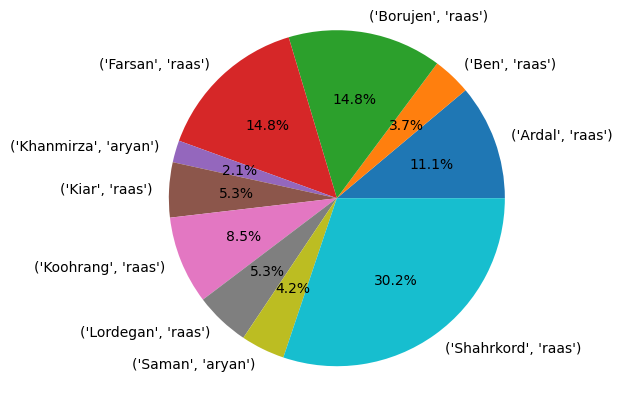

In [ ]:
plt.pie(max_breeds, labels=max_breeds.index, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [ ]:
#Calcute max cities for per breed
max_cities_per_breed = df_joojeh.groupby('HerdName')['County'].agg(lambda x: x.value_counts().idxmax())
print(max_cities_per_breed)

HerdName
Arirakerz (Aplas)    Shahrkord
aryan                Shahrkord
cab                    Borujen
raas                 Shahrkord
Name: County, dtype: object


In [ ]:
#Calcute min cities for per breed
min_cities_per_breed = df_joojeh.groupby('HerdName')['County'].agg(lambda x: x.value_counts().idxmin())
print(min_cities_per_breed)

HerdName
Arirakerz (Aplas)     Koohrang
aryan                      Ben
cab                  Khanmirza
raas                 Khanmirza
Name: County, dtype: object


In [ ]:
first_day = df_joojeh.groupby('HerdName')['productiondate'].min()
print(first_day)

HerdName
Arirakerz (Aplas)    1402-02-20 00:00:00
aryan                1402-01-03 00:00:00
cab                  1402-01-09 00:00:00
raas                 1402-01-05 00:00:00
Name: productiondate, dtype: object


In [ ]:
breed_list=[]
for row, i in df_arzeh.iterrows():
    breed = df_joojeh[df_joojeh['Resourcecode'] == i['Resourcecode']]['HerdName']
    try:
        breed_list.append(breed.item())
    except:
        breed_list.append(None)

df_arzeh['HerdName'] = breed_list
df_arzeh

,Resourcecode,ResourceAmount,ReasourceItemCount,LoadCode,LoadAmount,LoadItemCount,LoadRemainingValue,OfferCode,OfferAmount,DeliveryDate,OfferRemainingValue,RequestAmount,RecievedAmount,RecievedItemCount,HerdName
0,38882,43000.0,17200,143994,27592.4,10613,0,120829,28600.0,1402-02-27 00:00:00,0,28596.0,23650.0,10615.0,raas
1,38892,50000.0,20000,142140,2857.6,1100,0,119224,5980.0,1402-02-20 00:00:00,0,5975.0,2625.0,1100.0,aryan
2,38892,50000.0,20000,141572,31756.0,12703,0,118684,32500.0,1402-02-18 00:00:00,0,32496.0,28865.0,12703.0,aryan
3,38893,40000.0,16000,144943,32203.0,12882,0,121742,32500.0,1402-02-31 00:00:00,0,32493.0,30895.0,12882.0,aryan
4,38894,97500.0,39000,143378,50129.5,20052,0,120369,50000.0,1402-02-26 00:00:00,0,49997.0,52050.0,20052.0,raas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,43762,60000.0,24000,192146,32025.2,11438,0,166978,33600.0,1402-07-26 00:00:00,0,33596.0,29555.0,11440.0,raas
926,44905,50000.0,20000,193381,23163.4,8909,0,168187,23400.0,1402-07-30 00:00:00,0,23400.0,26180.0,8910.0,aryan
927,44905,50000.0,20000,194206,24394.2,8713,0,168969,24080.0,1402-08-02 00:00:00,0,24075.0,25520.0,8715.0,aryan
928,44906,22500.0,9000,194209,19350.5,7741,0,168972,22500.0,1402-08-02 00:00:00,0,22498.0,17491.0,7741.0,cab


In [ ]:
hatching_date_list=[]
for row, i in df_arzeh.iterrows():
    hatching_date = df_joojeh[df_joojeh['Resourcecode'] == i['Resourcecode']]['productiondate']
    try:
        hatching_date_list.append(hatching_date.item())
    except:
        hatching_date_list.append(None)

df_arzeh['productiondate'] = hatching_date_list
df_arzeh

,Resourcecode,ResourceAmount,ReasourceItemCount,LoadCode,LoadAmount,LoadItemCount,LoadRemainingValue,OfferCode,OfferAmount,DeliveryDate,OfferRemainingValue,RequestAmount,RecievedAmount,RecievedItemCount,HerdName,productiondate
0,38882,43000.0,17200,143994,27592.4,10613,0,120829,28600.0,1402-02-27 00:00:00,0,28596.0,23650.0,10615.0,raas,1402-01-06 00:00:00
1,38892,50000.0,20000,142140,2857.6,1100,0,119224,5980.0,1402-02-20 00:00:00,0,5975.0,2625.0,1100.0,aryan,1402-01-03 00:00:00
2,38892,50000.0,20000,141572,31756.0,12703,0,118684,32500.0,1402-02-18 00:00:00,0,32496.0,28865.0,12703.0,aryan,1402-01-03 00:00:00
3,38893,40000.0,16000,144943,32203.0,12882,0,121742,32500.0,1402-02-31 00:00:00,0,32493.0,30895.0,12882.0,aryan,1402-01-05 00:00:00
4,38894,97500.0,39000,143378,50129.5,20052,0,120369,50000.0,1402-02-26 00:00:00,0,49997.0,52050.0,20052.0,raas,1402-01-05 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,43762,60000.0,24000,192146,32025.2,11438,0,166978,33600.0,1402-07-26 00:00:00,0,33596.0,29555.0,11440.0,raas,1402-06-01 00:00:00
926,44905,50000.0,20000,193381,23163.4,8909,0,168187,23400.0,1402-07-30 00:00:00,0,23400.0,26180.0,8910.0,aryan,1402-06-12 00:00:00
927,44905,50000.0,20000,194206,24394.2,8713,0,168969,24080.0,1402-08-02 00:00:00,0,24075.0,25520.0,8715.0,aryan,1402-06-12 00:00:00
928,44906,22500.0,9000,194209,19350.5,7741,0,168972,22500.0,1402-08-02 00:00:00,0,22498.0,17491.0,7741.0,cab,1402-06-07 00:00:00


In [ ]:
# supply_date_list=[]
# for row, i in df_joojeh.iterrows():
#     supply_date = df_arzeh[df_arzeh['Productive Source ID'] == i['Productive Source ID']]['Supply Date']
#     try:
#         supply_date_list.append(supply_date.item())
#     except:
#         supply_date_list.append(None)

# df_joojeh['Supply Date'] = supply_date_list
# df_joojeh

In [ ]:
arze_day = df_arzeh.groupby('HerdName')['DeliveryDate'].min()
print(arze_day)

HerdName
Arirakerz (Aplas)    1402-04-03 00:00:00
aryan                1402-02-18 00:00:00
cab                  1402-02-24 00:00:00
raas                 1402-02-12 00:00:00
Name: DeliveryDate, dtype: object


In [ ]:
days_each_breed = arze_day - first_day
print(days_each_breed)

HerdName
Arirakerz (Aplas)   45 days
aryan               46 days
cab                 46 days
raas                38 days
dtype: timedelta64[ns]


In [ ]:
df_arzeh_new = df_arzeh[['productiondate', 'HerdName','DeliveryDate']]
df_arzeh_new.dropna()

,productiondate,HerdName,DeliveryDate
0,1402-01-06 00:00:00,raas,1402-02-27 00:00:00
1,1402-01-03 00:00:00,aryan,1402-02-20 00:00:00
2,1402-01-03 00:00:00,aryan,1402-02-18 00:00:00
3,1402-01-05 00:00:00,aryan,1402-02-31 00:00:00
4,1402-01-05 00:00:00,raas,1402-02-26 00:00:00
...,...,...,...
925,1402-06-01 00:00:00,raas,1402-07-26 00:00:00
926,1402-06-12 00:00:00,aryan,1402-07-30 00:00:00
927,1402-06-12 00:00:00,aryan,1402-08-02 00:00:00
928,1402-06-07 00:00:00,cab,1402-08-02 00:00:00


In [ ]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
enc.fit(df_arzeh_new['HerdName'])
df_arzeh_new["HerdName Encode"] = enc.transform(df_arzeh_new['HerdName'])
df_arzeh_new.drop('HerdName', axis=1, inplace=True)
df_arzeh_new.head()

<ipython-input-36-7ab30053c29f>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-36-7ab30053c29f>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,productiondate,DeliveryDate,HerdName Encode
0,1402-01-06 00:00:00,1402-02-27 00:00:00,3
1,1402-01-03 00:00:00,1402-02-20 00:00:00,1
2,1402-01-03 00:00:00,1402-02-18 00:00:00,1
3,1402-01-05 00:00:00,1402-02-31 00:00:00,1
4,1402-01-05 00:00:00,1402-02-26 00:00:00,3


In [ ]:
import datetime
df_arzeh_new['In need day'] = (df_arzeh_new['DeliveryDate'] - df_arzeh_new['productiondate'])
df_arzeh_new.dropna(inplace=True)
df_arzeh_new['In need day'] = df_arzeh_new['In need day'].apply(lambda x: x.days)
df_arzeh_new

<ipython-input-37-d06798db2b6f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-37-d06798db2b6f>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-37-d06798db2b6f>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,productiondate,DeliveryDate,HerdName Encode,In need day
0,1402-01-06 00:00:00,1402-02-27 00:00:00,3,52
1,1402-01-03 00:00:00,1402-02-20 00:00:00,1,48
2,1402-01-03 00:00:00,1402-02-18 00:00:00,1,46
3,1402-01-05 00:00:00,1402-02-31 00:00:00,1,57
4,1402-01-05 00:00:00,1402-02-26 00:00:00,3,52
...,...,...,...,...
925,1402-06-01 00:00:00,1402-07-26 00:00:00,3,56
926,1402-06-12 00:00:00,1402-07-30 00:00:00,1,49
927,1402-06-12 00:00:00,1402-08-02 00:00:00,1,51
928,1402-06-07 00:00:00,1402-08-02 00:00:00,2,56


In [ ]:
predict = 'DeliveryDate'

X = df_arzeh_new['HerdName Encode']
y = df_arzeh_new['In need day']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(np.reshape(X.tolist(),(len(X.tolist()), 1)),y.tolist(),test_size=0.2)

In [ ]:
X_train

In [ ]:
from xgboost import XGBRegressor
rgr = XGBRegressor()

rgr.fit(X_train, y_train)
y_hat = rgr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_hat)

4.427979611560126

In [ ]:
coded_breed = [0,1,2,3]
true_breed = enc.inverse_transform(coded_breed)
breed_dict = dict(zip(true_breed, coded_breed))
print(breed_dict)

{'Arirakerz (Aplas)': 0, 'aryan': 1, 'cab': 2, 'raas': 3}


In [ ]:
def find_the_supply_date(hatchin_date, breed):
    code = breed_dict[breed]
    days = rgr.predict(code)

    days = datetime.timedelta(days=int(days[0]))

    return hatchin_date + days

In [ ]:
find_the_supply_date(df_arzeh['productiondate'][0], df_arzeh['HerdName'][0])

/usr/local/lib/python3.10/dist-packages/xgboost/data.py:1037: UserWarning:

Unknown data type: <class 'int'>, trying to convert it to csr_matrix



jdatetime.datetime(1402, 2, 30, 0, 0)